# Concentration de CO2 dans l'atmosphère depuis 1958

Les données pour cette étude ont été téléchargées au format CSV le 8 Janvier 2020 via [le lien du MOOC](https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/blob/master/module3/Practical_session/Subject6_smoking.csv).
Sur chaque ligne il est indiqué si la personne fume ou non, si elle est vivante ou décédée au moment de la seconde étude, et son âge lors du premier sondage.

In [87]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import isoweek
import pandas as pd
import numpy as np


In [88]:
ini_data = pd.read_csv('Subject6_smoking.csv')
ini_data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

In [89]:
ini_data[ini_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Smoker, Status, Age]
Index: []

Y a-t-il des points manquants dans ce jeux de données ? Non il n'y en a pas

Dans un tableau sont représentés le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme. Pour chaque groupe (fumeuses / non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe et le nombre total de femmes dans ce groupe) est aussi calculé.

In [90]:
raw_data=ini_data.copy()
raw_data=pd.crosstab(index=raw_data['Smoker'], columns=raw_data['Status'])

taux1=raw_data.Dead[0]/(raw_data.Dead[0]+raw_data.Alive[0])
taux2=raw_data.Dead[1]/(raw_data.Dead[1]+raw_data.Alive[1])
raw_data['taux_mortalité']= [taux1*100, taux2*100]
raw_data

Status  Alive  Dead  taux_mortalité
Smoker                             
No        502   230       31.420765
Yes       443   139       23.883162

Ces résultats sont surpenants car ils montrent qu'il y a plus de femmes qui ne fumaient pas lors de la première étude qui sont mortes au moement de la deuxième (230 non fumeuses mortes) que de femmes qui fumaient (139 fumeuses mortes). Le taux de mortalité est plus élevé chez les non fumeuses (31 %) que chez les fumeuses (24 %).
Après 20 ans, le taux de mortalité chez les fumeuses est de 24%, alors que celui des non-fumeuses est de 31%. Alors, est-ce que non-fumer tue ?

Afin de préciser cette étude les effectifs et les taux de mortalité vont être recalculés en ajoutant une nouvelle catégorie liée à la classe d'âge. Ici sont considéres les classes d'ages suivantes : 18-34 ans, 34-54 ans, 55-64 ans et plus de 65 ans.

In [91]:
# Pour ne garder que les femmes ayant entre 18 et 34 ans : enlèves colonnes > 34 ans
dfini_18_34=ini_data.drop(ini_data[ini_data.Age > 34] .index)
# Pour ne garder que les femmes ayant entre 35 et 54 ans : enlèves colonnes < ou = à 34 ans et colonnes > 54 ans
dfini_35_54=ini_data.drop(ini_data[(ini_data.Age <= 34) | (ini_data.Age >54)] .index)
# Pour ne garder que les femmes ayant entre 55 et 64 ans : enlèves colonnes < ou = à 54 ans et colonnes > 64 ans
dfini_55_64=ini_data.drop(ini_data[(ini_data.Age <= 54) | (ini_data.Age >64)] .index)
# Pour ne garder que les femmes ayant plus de 65 ans : enlèves colonnes < ou = à 64 ans
dfini_65=ini_data.drop(ini_data[ini_data.Age <= 64] .index)

dfini_18_34

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
6        No  Alive  23.8
8       Yes  Alive  24.8
10      Yes  Alive  30.0
15       No  Alive  25.1
17       No  Alive  27.1
22       No  Alive  33.4
24       No  Alive  18.0
27       No  Alive  25.8
29       No  Alive  20.2
33       No  Alive  19.4
37      Yes  Alive  29.5
38      Yes   Dead  33.0
44       No  Alive  25.3
47       No  Alive  18.5
49      Yes  Alive  22.1
54       No  Alive  28.4
58       No  Alive  22.9
65      Yes  Alive  33.0
67      Yes  Alive  27.9
71      Yes  Alive  26.2
76       No  Alive  27.6
77      Yes  Alive  31.4
79       No  Alive  18.9
81      Yes  Alive  25.4
84       No  Alive  27.3
86       No  Alive  32.8
91       No  Alive  18.3
92      Yes  Alive  20.2
...     ...    ...   ...
1205     No  Alive  23.2
1207    Yes  Alive  31.4
1208    Yes  Alive  30.0
1213     No  Alive  21.4
1216    Yes  Alive  27.9
1217    Yes  Alive  29.5
1219    Yes  Alive  27.0
1223    Yes  Alive  28.3
1226    Yes  Alive  31.0
1232     No  Alive  28.3
1240    Yes  Alive  29.7
1247     No  Alive  26.0
1250     No  Alive  19.8
1251    Yes  Alive  27.8
1253    Yes  Alive  27.8
1255     No   Dead  28.5
1256     No  Alive  26.7
1260    Yes  Alive  20.4
1263    Yes  Alive  20.9
1265     No  Alive  26.7
1267     No  Alive  33.7
1271    Yes  Alive  24.9
1272     No  Alive  33.0
1274     No  Alive  25.7
1275     No  Alive  19.5
1277     No  Alive  23.4
1297    Yes  Alive  32.7
1301     No  Alive  20.5
1303    Yes  Alive  31.2
1310     No  Alive  22.3

[400 rows x 3 columns]

In [92]:
df_18_34=dfini_18_34.copy()
df_18_34=pd.crosstab(index=df_18_34['Smoker'], columns=df_18_34['Status'])
taux11=df_18_34.Dead[0]/(df_18_34.Dead[0]+df_18_34.Alive[0])
taux22=df_18_34.Dead[1]/(df_18_34.Dead[1]+df_18_34.Alive[1])
df_18_34['taux_mortalité']= [taux11*100, taux22*100]

df_18_34

Status  Alive  Dead  taux_mortalité
Smoker                             
No        213     6        2.739726
Yes       176     5        2.762431

In [93]:
df_35_54=dfini_35_54.copy()
df_35_54=pd.crosstab(index=df_35_54['Smoker'], columns=df_35_54['Status'])
taux111=df_35_54.Dead[0]/(df_35_54.Dead[0]+df_35_54.Alive[0])
taux222=df_35_54.Dead[1]/(df_35_54.Dead[1]+df_35_54.Alive[1])
df_35_54['taux_mortalité']= [taux111*100, taux222*100]

df_35_54

Status  Alive  Dead  taux_mortalité
Smoker                             
No        180    19        9.547739
Yes       196    41       17.299578

In [94]:
df_55_64=dfini_55_64.copy()
df_55_64=pd.crosstab(index=df_55_64['Smoker'], columns=df_55_64['Status'])
taux1111=df_55_64.Dead[0]/(df_55_64.Dead[0]+df_55_64.Alive[0])
taux2222=df_55_64.Dead[1]/(df_55_64.Dead[1]+df_55_64.Alive[1])
df_55_64['taux_mortalité']= [taux1111*100, taux2222*100]

df_55_64

Status  Alive  Dead  taux_mortalité
Smoker                             
No         81    40       33.057851
Yes        64    51       44.347826

In [95]:
df_65=dfini_65.copy()
df_65=pd.crosstab(index=df_65['Smoker'], columns=df_65['Status'])
taux11111=df_65.Dead[0]/(df_65.Dead[0]+df_65.Alive[0])
taux22222=df_65.Dead[1]/(df_65.Dead[1]+df_65.Alive[1])
df_65['taux_mortalité']= [taux11111*100, taux22222*100]

df_65

Status  Alive  Dead  taux_mortalité
Smoker                             
No         28   165       85.492228
Yes         7    42       85.714286

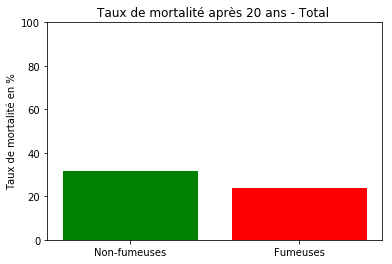

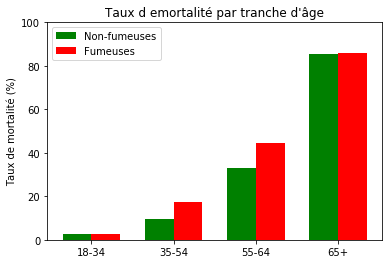

In [96]:
plt.title("Taux de mortalité après 20 ans - Total ")
x_tot=["Non-fumeuses", "Fumeuses"]
y_tot=[raw_data.taux_mortalité[0], raw_data.taux_mortalité[1]]
plt.ylim([0,100])
plt.bar(x_tot, y_tot, color=["green", "red"] )
plt.ylabel("Taux de mortalité en %")
plt.show()


labels = ['18-34', '35-54', '55-64', '65+']
y_nf=[df_18_34.taux_mortalité[0], df_35_54.taux_mortalité[0], df_55_64.taux_mortalité[0], df_65.taux_mortalité[0]]
y_f=[df_18_34.taux_mortalité[1], df_35_54.taux_mortalité[1], df_55_64.taux_mortalité[1], df_65.taux_mortalité[1]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_nf, width, color="green", label='Non-fumeuses')
rects2 = ax.bar(x + width/2, y_f, width, color="red",label='Fumeuses')

ax.set_ylabel('Taux de mortalité (%)')
ax.set_title("Taux d emortalité par tranche d'âge")
ax.set_xticks(x)
ax.set_ylim([0,100])
ax.set_xticklabels(labels)
ax.legend()

D'après les graphiques précédents, si on raisonne par classe d’âge, dans chaque tranche la mortalité chez les fumeuses a été supérieure à celle des non-fumeuses. C'est rassurant, mais comment les chiffres peuvent-ils s’inverser quand on groupe tout le monde ?

En fait dans la population initiale, il y avait plus de femmes âgées chez les non-fumeuses que chez les fumeuses. Et même si dans chaque tranche d’âge les non-fumeuses meurent moins, cet effet est compensé par le fait que la tranche d’âge     « élevée » est sur-représentée chez les non-fumeuses… qui donc en moyenne meurent plus !